In [3]:
DATASET_NAMES = ["les_miserables", "1138_bus", "USpowerGrid"]
PARAMS_NAMES = sorted(["number_of_pivots", "number_of_iterations", "eps"])
COLOR_MAP = {
    DATASET_NAMES[0]: 'red',
    DATASET_NAMES[1]: "green",
    DATASET_NAMES[2]: 'blue'
}
ALPHA = 0.1
print(DATASET_NAMES)
print(PARAMS_NAMES)
print(COLOR_MAP)

['les_miserables', '1138_bus', 'USpowerGrid']
['eps', 'number_of_iterations', 'number_of_pivots']
{'les_miserables': 'red', '1138_bus': 'green', 'USpowerGrid': 'blue'}


In [4]:
# Third Party Library
import pandas as pd

# First Party Library
from config.paths import get_project_root_path


def generate_data_df_dict(dataset_names):
    EXPERIENT_DATA_DIR = (
        get_project_root_path()
        .joinpath("data")
        .joinpath("experiments")
        .joinpath("regression_analysis")
    )

    data_df_dict = {}
    for dataset_name in dataset_names:
        data_path = EXPERIENT_DATA_DIR.joinpath("grid").joinpath(
            f"{dataset_name}-without-pos.pkl"
        )
        data_df_dict[dataset_name] = pd.read_pickle(data_path)

    return data_df_dict


def generate_params_candidates():
    params_steps = {
        "number_of_pivots": 5,
        "number_of_iterations": 10,
        "eps": 0.05,
    }

    params_candidates = {}
    params_name1s = ["number_of_pivots", "number_of_iterations", "eps"]
    for params_name1 in params_name1s:
        params_candidates[params_name1] = [
            v * params_steps[params_name1] for v in list(range(1, 20 + 1))
        ]

    return params_candidates


data_df_dict = generate_data_df_dict(DATASET_NAMES)
params_candidates = generate_params_candidates()


KeyboardInterrupt: 

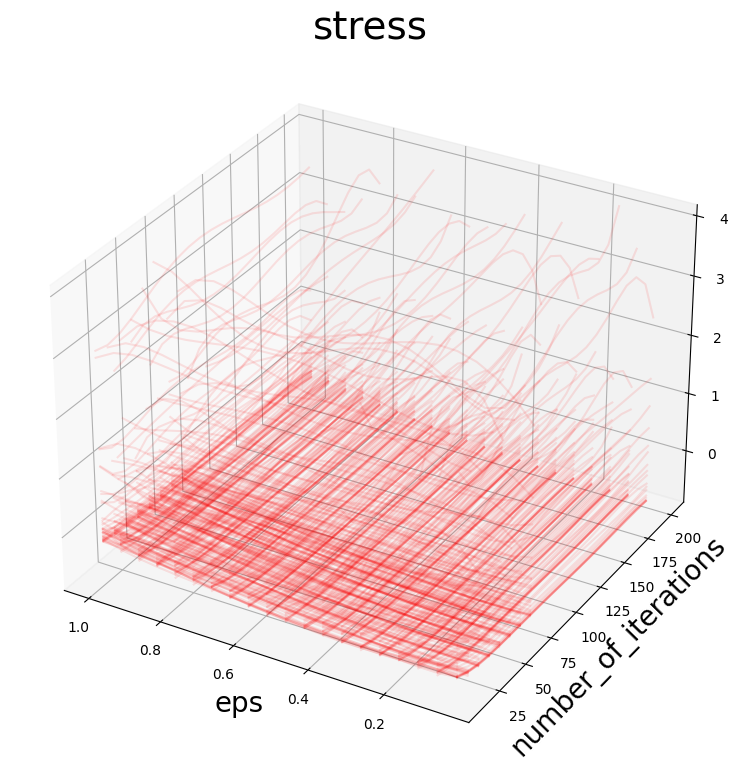

In [7]:
from itertools import combinations
import pickle
from config.paths import get_project_root_path
from config.quality_metrics import qm_names
import matplotlib.pyplot as plt
import numpy as np
ALL_QM_NAMES = qm_names

cs = list(combinations(PARAMS_NAMES, 2))


for c in cs:
    px = c[0]
    py = c[1]

    pe = list(filter(lambda x: x != px and x != py, PARAMS_NAMES))[0]
    pxvs = params_candidates[px]
    pyvs = params_candidates[py]
    pevs = params_candidates[pe]
    for qm_name in ALL_QM_NAMES:
        fig = plt.figure(figsize=(8, 8))
        axis = fig.add_subplot(111, projection="3d")
        fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.95)
        axis.set_title(f"{qm_name}", fontsize=28)
        axis.set_xlabel(px, fontsize=20)
        axis.set_ylabel(py, fontsize=20)
        axis.invert_xaxis()
        # px固定してpy回す
        for dataset_name in DATASET_NAMES:
            for pxv in pxvs:
                for pev in pevs:
                    params_info = f"{px}={pxv}-{pe}={pev}"
                    model_path = (
                        get_project_root_path()
                        .joinpath("data")
                        .joinpath("experiments")
                        .joinpath("regression_analysis")
                        .joinpath("models")
                        .joinpath("deg=5-ss")
                        .joinpath(
                            f"{dataset_name}-{qm_name}-{py}-{params_info}.pickle"
                        )
                    )
                    if not model_path.is_file():
                        params_info = f"{pe}={pev}-{px}={pxv}"
                        model_path = (
                            get_project_root_path()
                            .joinpath("data")
                            .joinpath("experiments")
                            .joinpath("regression_analysis")
                            .joinpath("models")
                            .joinpath("deg=5-ss")
                            .joinpath(
                                f"{dataset_name}-{qm_name}-{py}-{params_info}.pickle"
                            )
                        )
                    with open(model_path, mode="rb") as f:
                        regr = pickle.load(f)

                    y = np.array(pyvs).reshape(-1, 1)
                    x = np.array([pxv] * len(pyvs)).reshape(-1, 1)
                    z = regr.predict(y)

                    axis.plot(x, y, z, alpha=ALPHA, color=COLOR_MAP[dataset_name])

            # py固定してpx回す
            for pyv in pyvs:
                for pev in pevs:
                    params_info = f"{py}={pyv}-{pe}={pev}"
                    model_path = (
                        get_project_root_path()
                        .joinpath("data")
                        .joinpath("experiments")
                        .joinpath("regression_analysis")
                        .joinpath("models")
                        .joinpath("deg=5-ss")
                        .joinpath(
                            f"{dataset_name}-{qm_name}-{px}-{params_info}.pickle"
                        )
                    )
                    if not model_path.is_file():
                        params_info = f"{pe}={pev}-{py}={pyv}"
                        model_path = (
                            get_project_root_path()
                            .joinpath("data")
                            .joinpath("experiments")
                            .joinpath("regression_analysis")
                            .joinpath("models")
                            .joinpath("deg=5-ss")
                            .joinpath(
                                f"{dataset_name}-{qm_name}-{px}-{params_info}.pickle"
                            )
                        )
                    with open(model_path, mode="rb") as f:
                        regr = pickle.load(f)

                    x = np.array(pxvs).reshape(-1, 1)
                    y = np.array([pyv] * len(pxvs)).reshape(-1, 1)
                    z = regr.predict(x)

                    axis.plot(x, y, z, alpha=ALPHA, color=COLOR_MAP[dataset_name])

        export_path = (
            get_project_root_path()
            .joinpath("data")
            .joinpath("experiments")
            .joinpath("regression_analysis")
            .joinpath("3d_overlap")
            .joinpath("tmp")
            .joinpath(f"{qm_name}-{px}-{py}.png")
        )
        export_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(export_path)
        plt.close()


In [ ]:
from PIL import Image, ImageDraw, ImageFont


def get_concat_h(im1, im2):
    dst = Image.new("RGB", (im1.width + im2.width, im1.height), "black")
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


def get_concat_v(im1, im2):
    dst = Image.new("RGB", (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [ ]:
from PIL import Image, ImageDraw, ImageFont


image_path = (
    get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("regression_analysis")
    .joinpath("3d_overlap")
    .joinpath("tmp")
)
export_path = (
    get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("regression_analysis")
    .joinpath("3d_overlap")
)



for c in cs:
    px = c[0]
    py = c[1]
    images = []
    tmp = []
    for qm_name in ALL_QM_NAMES:
        img_path = image_path.joinpath(
            f"{qm_name}-{px}-{py}.png"
        )
        img = Image.open(img_path)

        tmp.append({"image": img})

        if len(tmp) == 3:
            images.append(tmp)
            tmp = []

    dst = None
    for v in images:
        h_dst = None
        for h in v:
            if h_dst is None:
                h_dst = h["image"]
                continue
            h_dst = get_concat_h(h_dst, h["image"])
        if dst is None:
            dst = h_dst
            continue
        dst = get_concat_v(dst, h_dst)
    draw = ImageDraw.Draw(dst)
    font = ImageFont.truetype("Arial.ttf", 40)
    for i, dataset_name in enumerate(DATASET_NAMES):
        draw.text((600, 40 * (i + 1)), f'{dataset_name}', COLOR_MAP[dataset_name], font=font)
    dst.save(export_path.joinpath(f"{px}-{py}.png"))
